# Avaliação Aula 05 - Introdução Ciência de Dados

# Exercicio 1
Considere o conjunto de dados: 
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
Y = [0, 3,4,5,10,8,12,15,15,19,22,21,26,28,27,29]. 

Calcule os coeficiente 𝑏0 e 𝑏1 na regressão linear, como vimos na aula. Ou seja, no modelo 𝑌≈𝑏0+𝑏1𝑋 ajustado a esses dados. Use o código abaixo para gerar os dados.
```python
import numpy as np
np.random.seed(100)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([0, 3,4,5,10,8,12,15,15,19,22,21,26,28,27,29])
```

Escolha uma:<br>
<b>a. b0: 0.50, b1: 10.0</b><br>
<b>b. b0: 0.16, b1: 2.0</b><br>
<b>c. b0: 1.0, b1: 0.1</b><br>
<b>d. b0: 2.5, b1: 2.5</b><br>
<b>e. b0: 2.0, b1: 2.0</b><br>

In [4]:
import numpy as np
np.random.seed(100)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([0, 3,4,5,10,8,12,15,15,19,22,21,26,28,27,29])

from statistics import variance 
import math 

def estimate_coef(x, y): 
    # número de observações/pontos
    n = np.size(x) 
  
    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

print("Resposta: b0 =",estimate_coef(x,y)[0],"b1 =",estimate_coef(x,y)[1])

Resposta: b0 = 0.16176470588235325 b1 = 2.011764705882353


# Exercicio 2
Para a base de dados de concreto, calcule o coeficiente R2 usando regressão linear múltipla, conforme feito na aula. Use o código abaixo para ler os dados. Considere 80% dos dados no conjunto de treinamento e 20% no teste. Use o código abaixo para ler os dados.

```python
import pandas as pd
data = pd.read_csv('data/concrete_data.csv', header=(0))
ylabel = data.columns[-1]
```

Escolha uma:<br>
<b>a. 0.9</b><br>
<b>b. 0.6</b><br>
<b>c. 0.1</b><br>
<b>d. 1.0</b><br>
<b>e. 0.2</b><br>

Resposta: R2 =  0.627553179231485


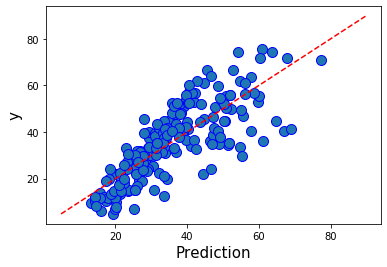

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/concrete_data.csv', header=(0))
ylabel = data.columns[-1]

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]


from sklearn.model_selection import train_test_split

p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)

print('Resposta: R2 = ', R2)

plt.show(True)

# Exercicio 3

Considerando a base de dados de concreto, do exercício anterior, qual o valor do coeficiente R2 usando ridge regression com alpha = 1? Considere 80% dos dados no conjunto de treinamento e 20% no teste. Use o código anterior para ler os dados.

Escolha uma:<br>
<b>a. 0.2</b><br>
<b>b. 0.4</b><br>
<b>c. 1.0</b><br>
<b>d. 0.1</b><br>
<b>e. 0.9</b><br>

In [15]:
import pandas as pd
data = pd.read_csv('data/concrete_data.csv', header=(0))
ylabel = data.columns[-1]

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]


from sklearn.model_selection import train_test_split

p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 1, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('Resposta: R2 =', R2)

Resposta: R2 = 0.45433143132957055


# Exercicio 4
Usando ainda a base de dados concreto, qual o valor de R2 usando LASSO para alpha = 0.1?

Escolha uma:<br>
<b>a. 0.4</b><br>
<b>b. 0.9</b><br>
<b>c. 1.0</b><br>
<b>d. 0.8</b><br>
<b>e. 0.1</b><br>

In [16]:
import pandas as pd
data = pd.read_csv('data/concrete_data.csv', header=(0))
ylabel = data.columns[-1]

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]


from sklearn.model_selection import train_test_split

p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data


from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("Resposta: R2 = ", R2)          # Calculate the test MSE

Resposta: R2 =  0.442955828642152


# Exercicio 5
Na seleção dos atributos usando Lasso, quantos atributos possuem coeficiente de regressão associado igual a zero? Considere alpha = 0.1 e a base de dados do exercício anterior. Dica: veja o exemplo da aula.

Escolha uma:<br>
<b>a. 0</b><br>
<b>b. 1</b><br>
<b>c. 8</b><br>
<b>d. 3</b><br>
<b>e. 6</b><br>

Resposta:  3

[ 0.04984444  0.01571604 -0.         -0.02831269  0.45739432 -0.
 -0.          0.04836531]


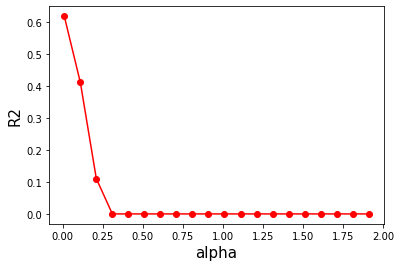

In [32]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/concrete_data.csv', header=(0))
ylabel = data.columns[-1]

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]


from sklearn.model_selection import train_test_split

p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data


from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)

vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)


lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
mask = (lasso.coef_ == 0 )

print("Resposta: ",lasso.coef_[mask].size)
print()
print(lasso.coef_)

plt.show(True)